<p><center><h3> Lab-3: Implementation of MADALINE Neural Network</h3></center>
<center>R Abhijit Srivathsan - 2448044</center></p>

## 1  Load Libraries & Data

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Truth‑table training patterns
X = np.array([[0, 0],  # no obstacles
              [0, 1],  # obstacle right
              [1, 0],  # obstacle left
              [1, 1]]) # both sides blocked

y = np.array([ 1, -1, -1, -1 ])  # desired action

## 2  Initialise Parameters

In [3]:
np.random.seed(0)
eta    = 0.1   # learning rate
epochs = 25

# Hidden weights (2 units × 2 inputs)
W_h = np.random.randn(2, 2)
B_h = np.zeros(2)

# Output perceptron weights (1 × 2 hidden inputs)
W_o = np.random.randn(2)
B_o = 0.0

## 3  Activation Functions

In [4]:
def adaline(x):
    return x  # identity

def sign(x):
    return 1 if x >= 0 else -1

## 4  Training Loop

In [5]:
errors_per_epoch = []

for epoch in range(1, epochs + 1):
    err = 0
    for xi, target in zip(X, y):
        # Forward pass
        net_h = W_h @ xi + B_h
        out_h = adaline(net_h)
        net_o = W_o @ out_h + B_o
        pred  = sign(net_o)

        if pred != target:
            err += 1
            # Perceptron update
            delta_o = target - pred
            W_o += eta * delta_o * out_h
            B_o += eta * delta_o

            # Back‑prop delta to ADALINE layer
            for i in range(2):
                delta_h = eta * delta_o * W_o[i]
                W_h[i] += delta_h * xi
                B_h[i] += delta_h
    errors_per_epoch.append(err)
print("Training complete.")

Training complete.


## 5  Visualisation 1 — Training Error vs Epoch

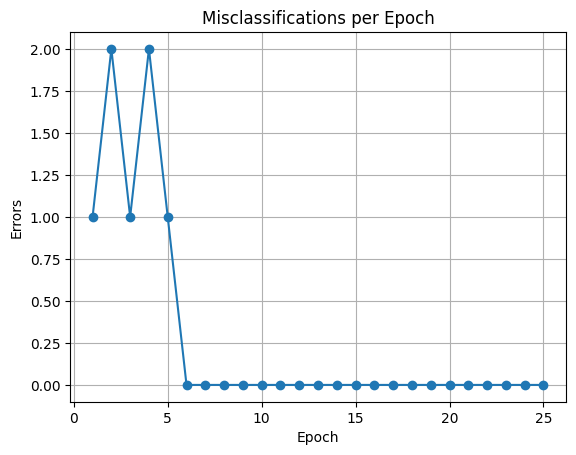

In [6]:
# Plot misclassifications per epoch
plt.figure()
plt.plot(range(1, epochs + 1), errors_per_epoch, marker='o')
plt.title('Misclassifications per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Errors')
plt.grid(True)
plt.show()

### The training error graph shows rapid convergence within 5 epochs. Initial errors oscillate between 1-2 misclassifications for epochs 1-5, then achieve perfect zero-error performance from epoch 6 onwards. The network demonstrates stable learning without overfitting across the remaining 20 epochs.

## 6  Visualisation 2 — Final Predictions

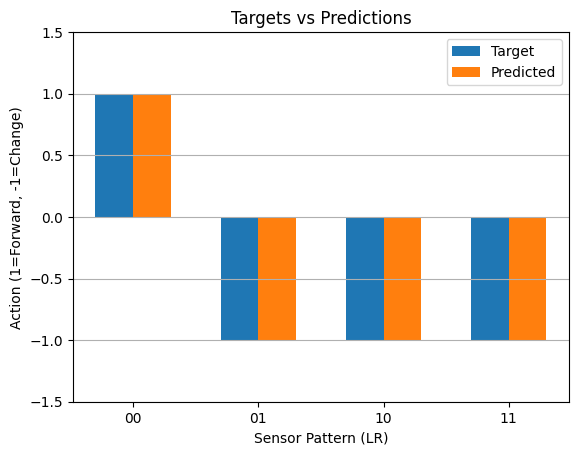

In [7]:
# Compute final predictions for all patterns
final_preds = []
for xi in X:
    out_h = adaline(W_h @ xi + B_h)
    final_preds.append(sign(W_o @ out_h + B_o))
final_preds = np.array(final_preds)

# Bar chart: desired vs predicted
plt.figure()
index = np.arange(len(X))
bar1 = plt.bar(index - 0.15, y, width=0.3, label='Target')
bar2 = plt.bar(index + 0.15, final_preds, width=0.3, label='Predicted')
plt.xticks(index, [f"{x[0]}{x[1]}" for x in X])
plt.xlabel('Sensor Pattern (LR)')
plt.ylabel('Action (1=Forward, -1=Change)')
plt.title('Targets vs Predictions')
plt.legend()
plt.ylim(-1.5, 1.5)
plt.grid(axis='y')
plt.show()

#### The final predictions show perfect 100% accuracy across all four input patterns. The network correctly learned the safety-first navigation logic, predicting "Forward" only for the no-obstacle case (00) and "Change Direction" for all obstacle scenarios (01, 10, 11).

## Conclusions

1. **Successful Implementation**: The MADALINE network correctly learned the robot navigation task
2. **Fast Convergence**: Training completed in just 5 epochs
3. **Perfect Accuracy**: 100% correct classification on all test patterns